In [47]:
#%pip install numpy

In [48]:
import numpy as np 

In [46]:
#%pip install pandas

In [49]:
import pandas as pd 

In [45]:
#%pip install seaborn

In [50]:
import seaborn as sns  

In [44]:
#%pip install matplotlib

In [51]:
import matplotlib.pyplot as plt

### Step 1: Import Dataset

In [52]:
dataset = pd.read_csv("breast-cancer-wisconsin-data_data.csv")

In [53]:
# Check the format of the dataset
dataset.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,M
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,M
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,M
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,M
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,M


In [54]:
# Check if any null values exist
dataset.isnull().sum()
dataset.isna().sum()

id                         0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
diagnosis                  0
dtype: int64

### Step 2: Exploratory Data Analysis (EDA)

In [55]:
# How many rows fall into each Diagnosis category 
dataset.groupby('diagnosis').size()

diagnosis
B    357
M    212
dtype: int64

In [56]:
diagnosis_coder = {'M':1, 'B':0}

In [57]:
# Numerize diagnosis "M" malignant; "B" benign using a dictionary and map function
dataset.diagnosis = dataset.diagnosis.map(diagnosis_coder)

In [58]:
dataset.diagnosis

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

In [59]:
y = dataset.diagnosis

In [60]:
outcome_count = pd.DataFrame(pd.Series(y.value_counts()))
outcome_count.index = ['Benign', 'Malignant']

In [61]:
outcome_count['percent'] = 100*outcome_count['diagnosis']/sum(outcome_count['diagnosis'])
outcome_count

,diagnosis,percent
Benign,357,62.741652
Malignant,212,37.258348


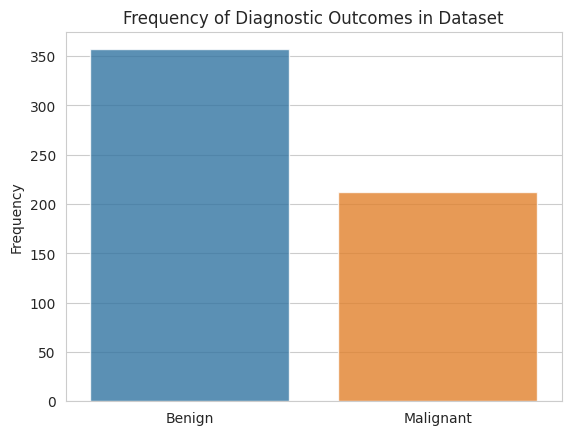

In [62]:
# Visualize frequency of diagnoses in dataset
sns.barplot(x = ['Benign', 'Malignant'], y = 'diagnosis', data = outcome_count, alpha = .8)
plt.title('Frequency of Diagnostic Outcomes in Dataset')
plt.ylabel('Frequency')
plt.show()

#### Exploring data using Histogram Plots

There are now 30 variables we can visualise splitting the dataset into 3 plots containing 10 variables each. The dataset is conveniently ordered into distinct groups: mean, se and worst

In [63]:
# For visual comparisons of differential diagnosis...
# create to dataframes - one for benign, one for malignant tumor data
data_n = dataset[dataset['diagnosis'] == 0]
data_y = dataset[dataset['diagnosis'] == 1]

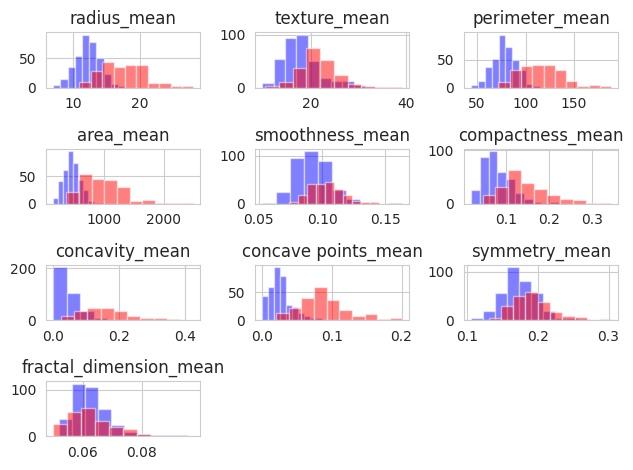

In [71]:
# Instantiate a figure object for OOP figure manipulation.
fig = plt.figure()

# Create 'for loop' to enerate though tumor features and compare with histograms
for i,b in enumerate((dataset.columns[1:11])):
    
    # Enumerate starts at index 0, need to add 1 for subplotting
    i +=1
    
    # Create axes object for position i
    ax = fig.add_subplot(4,3,i)
    
    # Plot via histogram tumor charateristics using stacked and alpha parameters for..
    # comparisons.
    ax.hist(data_n[b], label = 'Benign', stacked = True, alpha=0.5, color= 'b')
    ax.hist(data_y[b], label= 'Malignant', stacked = True, alpha=0.5, color= 'r')
    
    ax.set_title(b)

sns.set_style("whitegrid")
plt.tight_layout()
plt.show()  

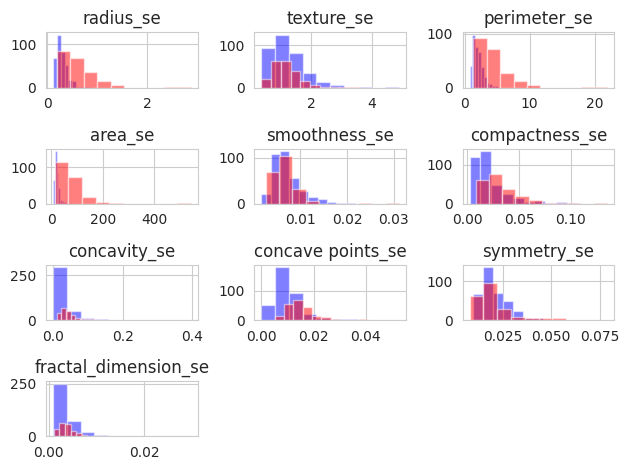

In [72]:
# Instantiate a figure object for OOP figure manipulation.
fig = plt.figure()

# Create 'for loop' to enerate though tumor features and compare with histograms
for i,b in enumerate((dataset.columns[11:21])):
    
    # Enumerate starts at index 0, need to add 1 for subplotting
    i +=1
    
    # Create axes object for position i
    ax = fig.add_subplot(4,3,i)
    
    # Plot via histogram tumor charateristics using stacked and alpha parameters for..
    # comparisons.
    ax.hist(data_n[b], label = 'Benign', stacked = True, alpha=0.5, color= 'b')
    ax.hist(data_y[b], label= 'Malignant', stacked = True, alpha=0.5, color= 'r')
    
    ax.set_title(b)

sns.set_style("whitegrid")
plt.tight_layout()
plt.show()  

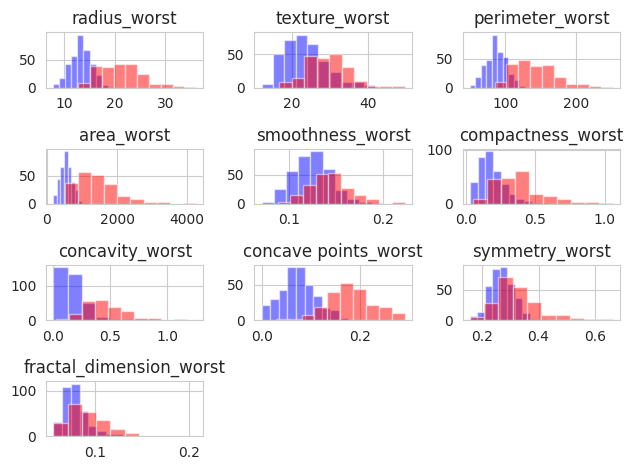

In [73]:
# Instantiate a figure object for OOP figure manipulation.
fig = plt.figure()

# Create 'for loop' to enerate though tumor features and compare with histograms
for i,b in enumerate((dataset.columns[21:-1])):
    
    # Enumerate starts at index 0, need to add 1 for subplotting
    i +=1
    
    # Create axes object for position i
    ax = fig.add_subplot(4,3,i)
    
    # Plot via histogram tumor charateristics using stacked and alpha parameters for..
    # comparisons.
    ax.hist(data_n[b], label = 'Benign', stacked = True, alpha=0.5, color= 'b')
    ax.hist(data_y[b], label= 'Malignant', stacked = True, alpha=0.5, color= 'r')
    
    ax.set_title(b)

sns.set_style("whitegrid")
plt.tight_layout()
plt.show()  

In general, malignant tumors have higher values for most measurements. Radius, texture, smoothness, compactness and concavity are of particular interest. The distribution of malignant and benign cells appear to be shifted to the right and/or shaped differently for several of the features, particularly concavity and radius.

#### Exploring data using Violin Plots

In [74]:
list = ['id','diagnosis']
# X includes our variables
X = dataset.drop(list,axis = 1)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'radius_mean'),
  Text(1, 0, 'texture_mean'),
  Text(2, 0, 'perimeter_mean'),
  Text(3, 0, 'area_mean'),
  Text(4, 0, 'smoothness_mean'),
  Text(5, 0, 'compactness_mean'),
  Text(6, 0, 'concavity_mean'),
  Text(7, 0, 'concave points_mean'),
  Text(8, 0, 'symmetry_mean'),
  Text(9, 0, 'fractal_dimension_mean')])

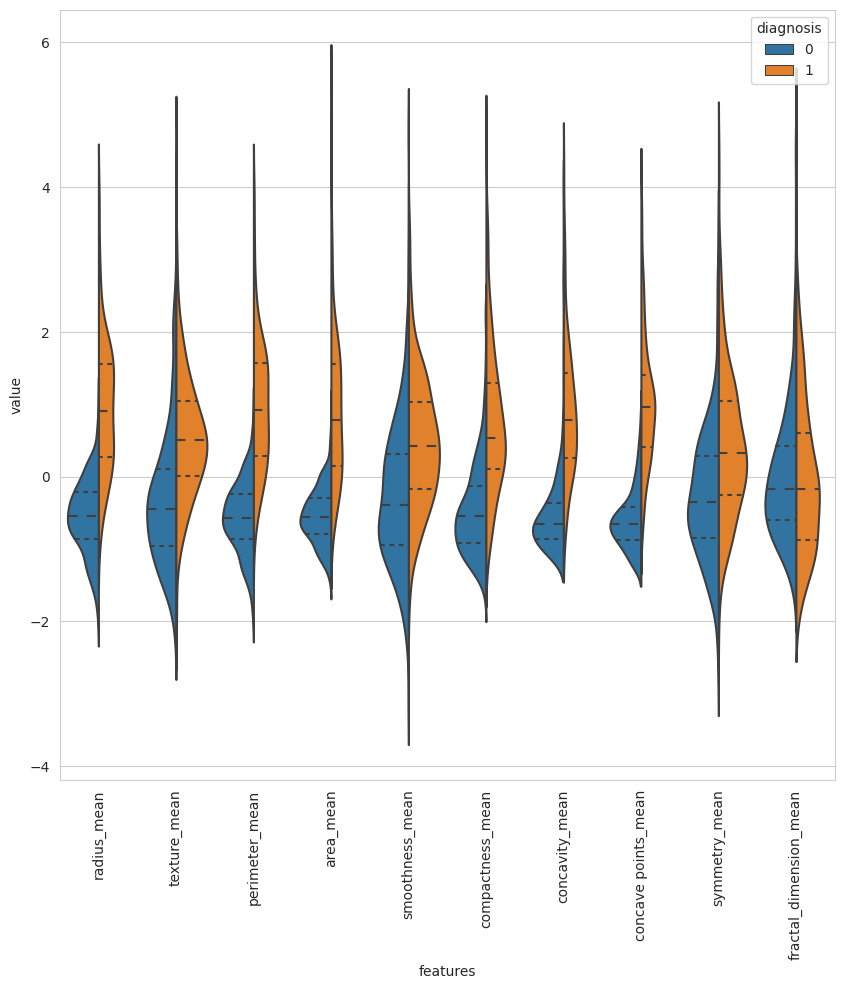

In [75]:
# get the first ten variables
data_dia = y
data = X
data_std = (data - data.mean()) / (data.std()) # standardization
# get the first 10 variables
data = pd.concat([y,data_std.iloc[:,0:10]],axis=1)
# melt function allows for the numeric columns dataset to be pivoted and two new variables are created: value and variable
data = pd.melt(data,id_vars="diagnosis",
 var_name="features",
 value_name='value')
# make a violin plot
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data,split=True, inner="quart")
plt.xticks(rotation=90)

The median of texture_mean for Malignant and Benign looks separated while for symmetry_mean and fractal_dimension_mean, the medians of the diagnosis groups are closely related. Because of this texture_mean would be the better choice for classification. From the below chart the medians for almost all Malignant or Benign don't vary much for the standard error. The distribution curve for area_se is skewed. The distribution of datapoints for area_worst look well separated, so it might be easier to use this feature for classification.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'radius_se'),
  Text(1, 0, 'texture_se'),
  Text(2, 0, 'perimeter_se'),
  Text(3, 0, 'area_se'),
  Text(4, 0, 'smoothness_se'),
  Text(5, 0, 'compactness_se'),
  Text(6, 0, 'concavity_se'),
  Text(7, 0, 'concave points_se'),
  Text(8, 0, 'symmetry_se'),
  Text(9, 0, 'fractal_dimension_se')])

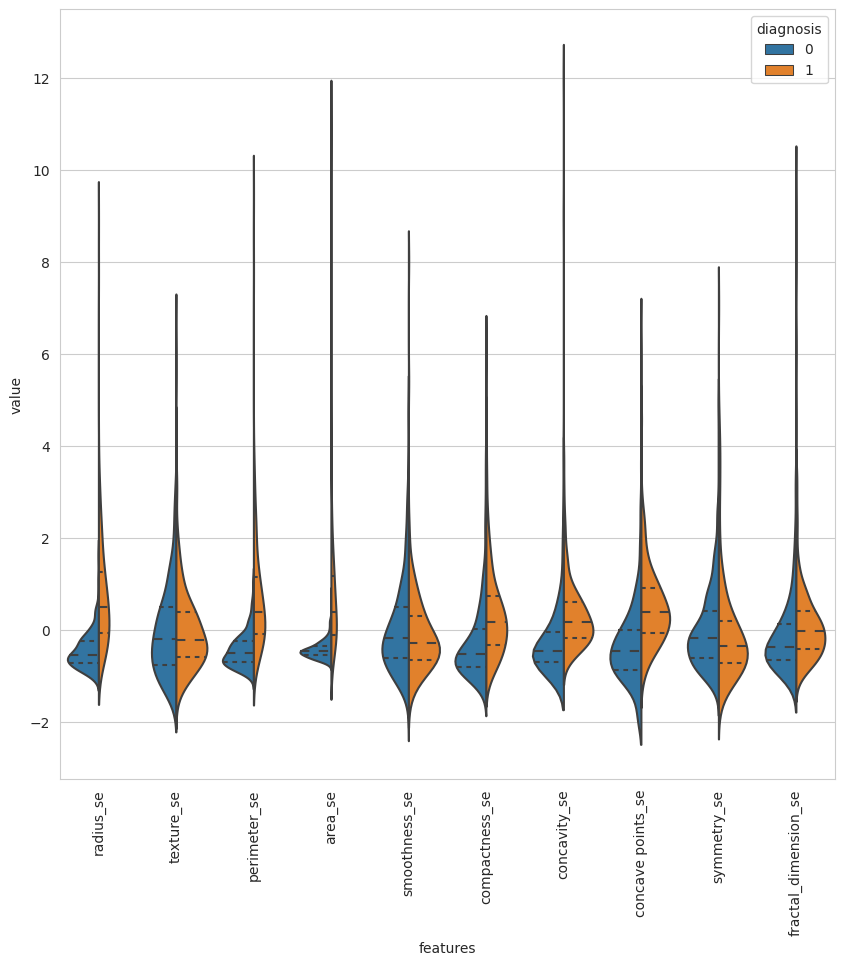

In [76]:
# Second ten features
data = pd.concat([y,data_std.iloc[:,10:20]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data,split=True, inner="quart")
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'radius_worst'),
  Text(1, 0, 'texture_worst'),
  Text(2, 0, 'perimeter_worst'),
  Text(3, 0, 'area_worst'),
  Text(4, 0, 'smoothness_worst'),
  Text(5, 0, 'compactness_worst'),
  Text(6, 0, 'concavity_worst'),
  Text(7, 0, 'concave points_worst'),
  Text(8, 0, 'symmetry_worst'),
  Text(9, 0, 'fractal_dimension_worst')])

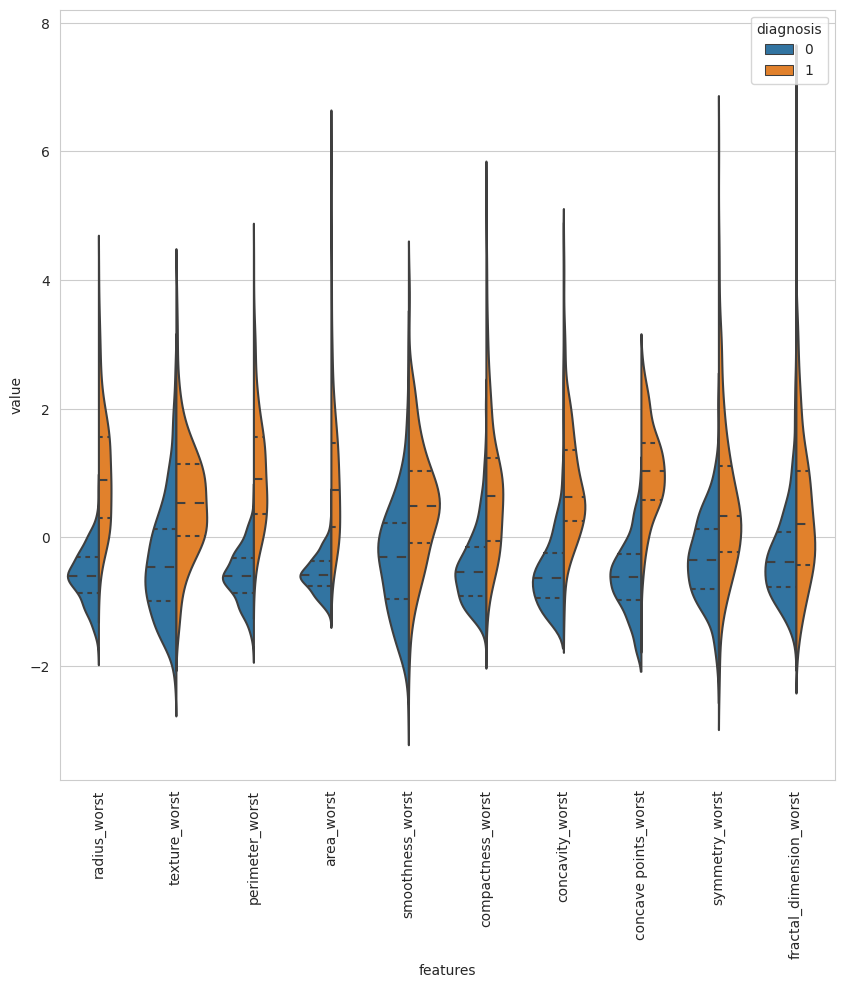

In [77]:
# Last ten features
data = pd.concat([y,data_std.iloc[:,20:31]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data,split=True, inner="quart")
plt.xticks(rotation=90)

In general, it is recommended to avoid having correlated features in your dataset. Indeed, a group of highly correlated features will not bring additional information (or just very few), but will increase the complexity of the algorithm, thus increasing the risk of errors. Because of this variables that have a high correlation will be removed.

Our objective is to identify which features are most helpful in predicting malignant or benign cancer and to classify whether the breast cancer is benign or malignant.

### Step 3: Feature Selection

#### Correlation Matrix/Heat Map

In general, it is recommended to avoid having correlated features in your dataset. Indeed, a group of highly correlated features will not bring additional information (or just very few), but will increase the complexity of the algorithm, thus increasing the risk of errors. Because of this variables that have a high correlation will be removed.

* From the correlation matrix above, here are quite a few variavles with high correlations. The formulas return a value between -1 and 1, where: 1 indicates a strong positive relationship. -1 indicates a strong negative relationship. A result of zero indicates no relationship at all. 
* In general, it is recommended to avoid having correlated features in your dataset. Indeed, a group of highly correlated features will not bring additional information (or just very few), but will increase the complexity of the algorithm, thus increasing the risk of errors. Because of this I've dropped variables with a correlation higher than .95.
* There are quite a few variables that are correlated. Often we have features that are highly correlated and those provide redundant information. By eliminating highly correlated features we can avoid a predictive bias for the information contained in these features. This also shows us, that when we want to make statements about the biological/ medical importance of specific features, we need to keep in mind that just because they are suitable to predicting an outcome they are not necessarily causal - they could simply be correlated with causal factors.

<AxesSubplot:>

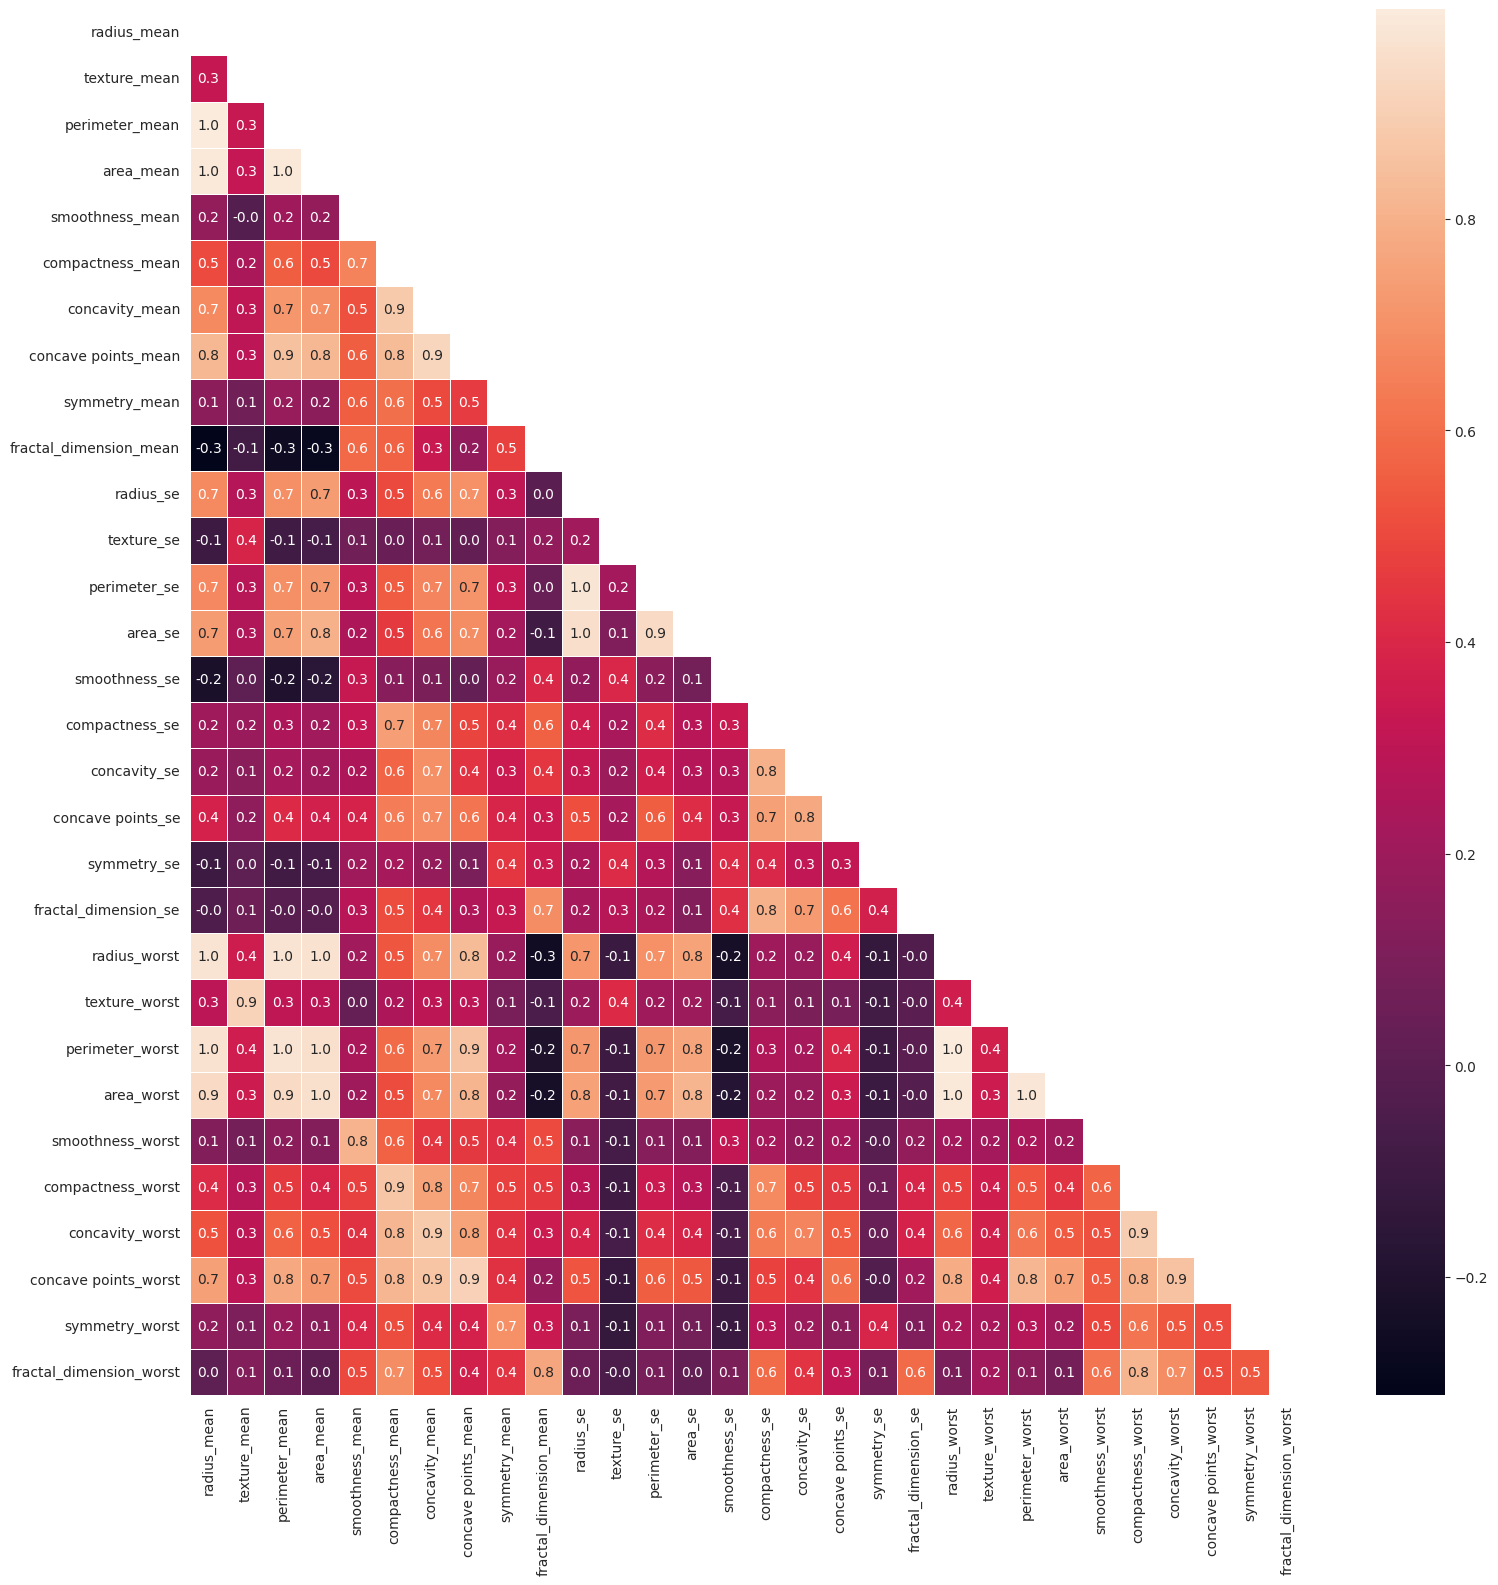

In [28]:
#correlation map
f,ax = plt.subplots(figsize=(18, 18))
matrix = np.triu(X.corr())
sns.heatmap(X.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax, mask=matrix)

In [29]:
# Create a full correlation matrix
corr_matrix = X.corr().abs()
# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

From the correlation matrix above, here are quite a few variavles with high correlations. In general, it is recommended to avoid having correlated features in your dataset. Indeed, a group of highly correlated features will not bring additional information (or just very few), but will increase the complexity of the algorithm, thus increasing the risk of errors. Because of this I've dropped variables with a correlation higher than .95.

In [30]:
# Find index of feature columns with correlation greater than 0.95
# Spot check these columns against the above matrix
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
to_drop

['perimeter_mean',
 'area_mean',
 'perimeter_se',
 'area_se',
 'radius_worst',
 'perimeter_worst',
 'area_worst']

In [31]:
# Drop features 
X = X.drop(X[to_drop], axis=1)

##### Chi-Square for the feature selection

In [46]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [47]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# find best scored 10 features
select_feature = SelectKBest(chi2, k=10).fit(x_train, y_train)

In [48]:
# this is how we can make a list of the selected features
selected_feature_chi2 = x_train.columns[select_feature.get_support()]

In [49]:
# let's print some stats
print('total features: {}'.format((x_train.shape[1])))
print('selected features: {}'.format(len(selected_feature_chi2)))
print('Chosen best 10 feature by Chi2:',selected_feature_chi2)

total features: 23
selected features: 10
Chosen best 10 feature by Chi2: Index(['radius_mean', 'texture_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'radius_se', 'texture_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst'],
      dtype='object')


##### Random Forest for the feature selection

In [50]:
from sklearn.feature_selection import RFE
# Create the RFE object and rank each pixel
rf_1 = RandomForestClassifier()      
rfe = RFE(estimator=rf_1, n_features_to_select=10, step=1)
rfe = rfe.fit(x_train, y_train)
# let's print the number of total and selected features

In [51]:
# this is how we can make a list of the selected features
selected_feature_rfe = x_train.columns[rfe.support_]

In [52]:
# let's print some stats
print('total features: {}'.format((x_train.shape[1])))
print('selected features: {}'.format(len(selected_feature_rfe)))
print('Chosen best 10 feature by rfe:',x_train.columns[rfe.support_])

total features: 23
selected features: 10
Chosen best 10 feature by rfe: Index(['radius_mean', 'texture_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'fractal_dimension_mean', 'radius_se',
       'texture_worst', 'concavity_worst', 'concave points_worst'],
      dtype='object')


* I've used two different methods with similar results based on there being 10 best features however this is just an assumption - it could have been any number of features. Therefor I will use cross validation to not only find best features but also find how many features do I need for best accuracy.

In [53]:
from sklearn.feature_selection import RFECV
# The "accuracy" scoring is proportional to the number of correct classifications
rf_2 = RandomForestClassifier() 
rfecv = RFECV(estimator=rf_2, step=1, cv=5,scoring='accuracy')   #5-fold cross-validation
rfecv = rfecv.fit(x_train, y_train)

In [54]:
# let's print the number of total and selected features
# this is how we can make a list of the selected features
selected_feature_rfecv = x_train.columns[rfecv.support_]

In [55]:
# let's print some stats
print('total features: {}'.format((x_train.shape[1])))
print('selected features: {}'.format(len(selected_feature_rfecv)))
print('Optimal number of features :', rfecv.n_features_)
print('Best features by rfecv:',x_train.columns[rfecv.support_])


total features: 23
selected features: 14
Optimal number of features : 14
Best features by rfecv: Index(['radius_mean', 'texture_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'fractal_dimension_mean', 'radius_se',
       'concavity_se', 'fractal_dimension_se', 'texture_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst'],
      dtype='object')
